In [25]:
import pandas as pd

In [26]:
smcs = pd.read_csv("smc.caqtls.tsv", sep="\t", header=0)


In [27]:
smcs.head()

,Chromosome,SNP_position,Ref_allele,Alt_allele,Log10_BH_Q,Effect_size,logfc.mean,jsd.sign.mean,IsUsed
0,chr1,1067007,A,G,-4.920961,0.200715,0.022735,0.008771,False
1,chr1,108121219,C,G,-4.118572,0.228169,0.021728,0.009595,False
2,chr1,108721447,C,T,-9.266900,0.764114,0.289341,0.031146,True
3,chr1,108842308,G,C,-4.721082,0.242912,-0.293381,-0.041953,False
4,chr1,109272630,A,G,-3.006430,0.709092,0.100375,0.016716,False


(0.6981379220575643, 1.1026216279404355e-57)
(0.3794467644777755, 1.1503131753550222e-14)


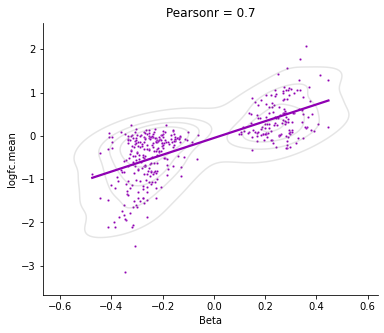

In [29]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = smcs[smcs["IsUsed"]==True]["logfc.mean"]
data["Beta"] = smcs[smcs["IsUsed"]==True]["Effect_size"]-0.5

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#8f00b3")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#8f00b3")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
plt.savefig("subfigs/smc_caqtls_scatter_plot.pdf", transparent=True, dpi=300)



In [34]:
import pandas as pd

df = pd.DataFrame()


values = []

atac_pear = scipy.stats.pearsonr(smcs[smcs["IsUsed"]==True]["logfc.mean"],smcs[smcs["IsUsed"]==True]["Effect_size"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(smcs[smcs["IsUsed"]==True]["jsd.sign.mean"],smcs[smcs["IsUsed"]==True]["Effect_size"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(smcs[smcs["IsUsed"]==True]["logfc.mean"]),abs(smcs[smcs["IsUsed"]==True]["Effect_size"]-0.5))
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(smcs[smcs["IsUsed"]==True]["jsd.sign.mean"]),abs(smcs[smcs["IsUsed"]==True]["Effect_size"]-0.5))
values.append(atac_pear[0])

df["pearsonr"] = values
df["method"] = ["logfc-signed", "jsd-signed",  "logfc-unsigned", "jsd-unsigned"]
df["dtype"] = ["ATAC"]*4

0    0.698138
1    0.684390
2    0.379447
3    0.374505
Name: pearsonr, dtype: float64


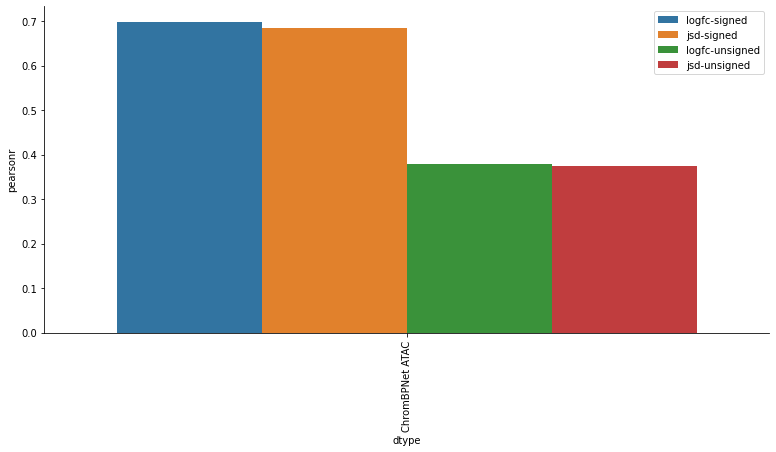

In [35]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="dtype", y="pearsonr", hue="method")
xtix = ["ChromBPNet ATAC"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")

plt.savefig("subfigs/smc_caqtls_compare.pdf", transparent=True, dpi=300)


(0.4073428461878613, 3.588308800985343e-80)
(0.26517398418227, 2.7971689609304756e-33)


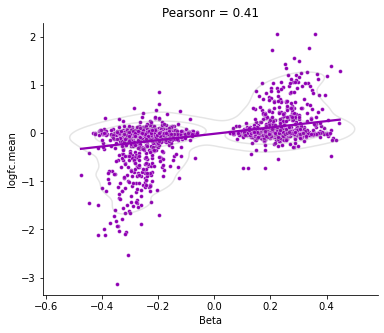

In [24]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = smcs["logfc.mean"]
data["Beta"] = smcs["Effect_size"]-0.5

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#8f00b3")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#8f00b3")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
